# Analysis of STAR-PU Data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
%matplotlib inline

In [5]:
data = pd.read_csv("C:/Users/m84300af/OneDrive - The University of Manchester/Documents/GitHub/amr-uom-brit/output/measures/measure_STARPU_antibiotics.csv") #error: this file doe not exist!
data

,practice,sex,age_cat,antibacterial_prescriptions,population,value,date
0,10,F,0-4,NaN,NaN,NaN,2019-01-01
1,10,F,15-24,NaN,NaN,NaN,2019-01-01
2,10,F,25-34,NaN,NaN,NaN,2019-01-01
3,10,F,35-44,NaN,NaN,NaN,2019-01-01
4,10,F,45-54,NaN,NaN,NaN,2019-01-01
...,...,...,...,...,...,...,...
18211,8,M,45-54,NaN,NaN,NaN,2021-09-01
18212,8,M,5-14,NaN,NaN,NaN,2021-09-01
18213,8,M,55-64,NaN,NaN,NaN,2021-09-01
18214,8,M,65-74,NaN,NaN,NaN,2021-09-01


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18216 entries, 0 to 18215
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   practice                     18216 non-null  int64  
 1   sex                          18216 non-null  object 
 2   age_cat                      18216 non-null  object 
 3   antibacterial_prescriptions  11465 non-null  float64
 4   population                   11465 non-null  float64
 5   value                        11465 non-null  float64
 6   date                         18216 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 996.3+ KB


In [6]:
data.describe()

,practice,antibacterial_prescriptions,population,value
count,18216.000000,11465.000000,11465.000000,11465.000000
mean,24.485178,3.628696,2.878325,1.260282
std,9.073119,3.434010,1.896283,1.062110
min,4.000000,-1.000000,1.000000,-0.500000
25%,17.000000,1.000000,1.000000,0.250000
50%,24.000000,3.000000,2.000000,1.000000
75%,32.000000,5.000000,4.000000,2.000000
max,46.000000,25.000000,13.000000,6.000000


In [11]:
data['practice'].value_counts().sort_index()

4      18
6      36
7      90
8     144
9     216
10    450
11    450
12    594
13    594
14    594
15    594
16    594
17    594
18    594
19    594
20    594
21    594
22    594
23    594
24    594
25    594
26    594
27    594
28    594
29    594
30    594
31    594
32    594
33    594
34    594
35    594
36    594
37    540
38    504
39    324
40    288
41    126
42    108
43     36
44     18
46     18
Name: practice, dtype: int64

In [16]:
data['sex'].value_counts().sort_index()

F    9108
M    9108
Name: sex, dtype: int64

In [15]:
data['age_cat'].value_counts().sort_index()

0-4      2024
15-24    2024
25-34    2024
35-44    2024
45-54    2024
5-14     2024
55-64    2024
65-74    2024
75+      2024
Name: age_cat, dtype: int64

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


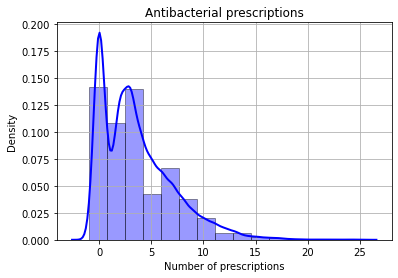

In [18]:
sns.distplot(data['antibacterial_prescriptions'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Number of prescriptions')
#plt.ylabel('Frequency')
plt.title('Antibacterial prescriptions')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.show()

C:\Users\m84300af\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


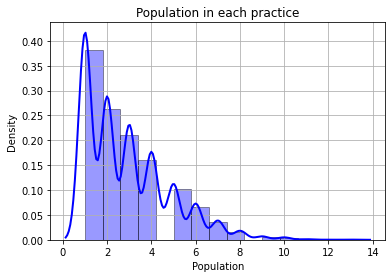

In [20]:
sns.distplot(data['population'], hist=True, kde=True, 
             bins=15, color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.xlabel('Population')
#plt.ylabel('Frequency')
plt.title('Population in each practice')
#plt.xlim(0, 100)
#plt.ylim(0, 1100)
plt.grid(True)
plt.show()

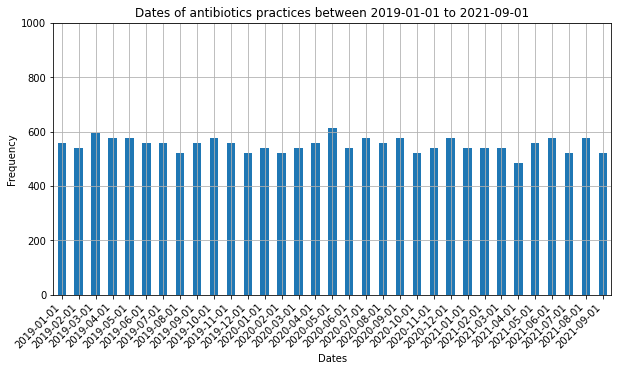

In [31]:
data['date'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.ylim(0, 1000)
plt.xticks(rotation = 45, ha="right")
plt.title("Dates of antibiotics practices between 2019-01-01 to 2021-09-01")
plt.xlabel('Dates')
plt.ylabel('Frequency')
plt.grid()
plt.show()
#plt.savefig("output/hist.png")

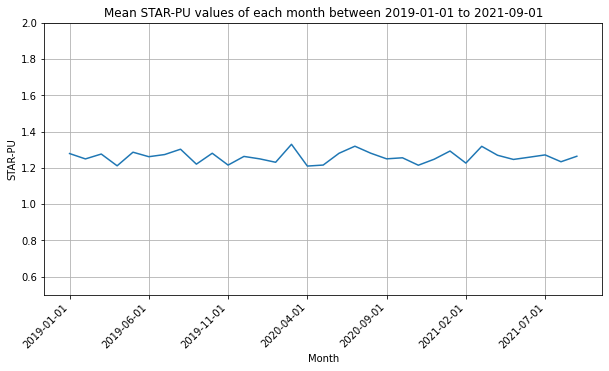

In [29]:
data.groupby(['date'])['value'].mean().plot(kind='line', figsize=(10, 5))
plt.ylim(0.5, 2)
plt.xticks(rotation = 45, ha="right")
plt.title("Mean STAR-PU values of each month between 2019-01-01 to 2021-09-01")
plt.xlabel('Month')
plt.ylabel('STAR-PU')
plt.grid()
plt.show()
#plt.savefig("output/hist.png")